"For this example, we will try to predict how much money we should budget for sales commissions for the next year. This problem is useful for modeling because we have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments." - https://pbpython.com/monte-carlo.html

Commission Amount = Sales * Commission Rate

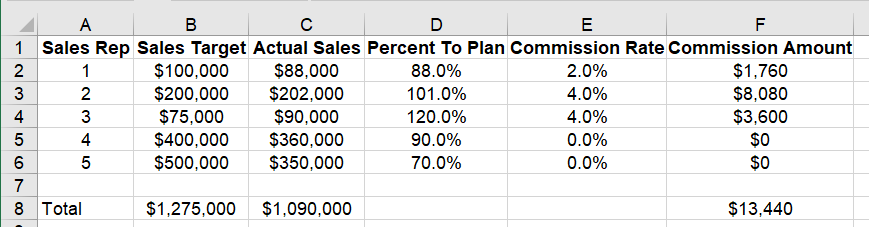 

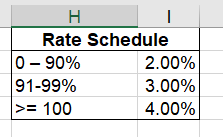

In the Monte Carlo simulation the variable is based off of a [probability distribution](https://www.mikulskibartosz.name/monte-carlo-simulation-in-python/). In this case it is a normal distribution around 100% percent to plan with a standard deviation of 10%

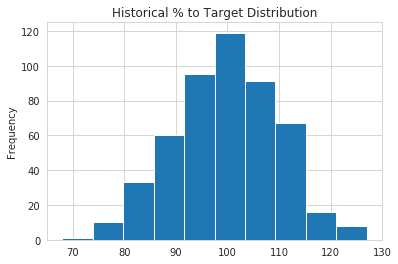

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

sns.set_style('whitegrid')

Numpy can be used to do random number generation based off of the distribution we have above:

In [2]:
mean = 1
st_dev = .1
n_reps = 500 #represents the number of employees
n_simulations = 1000 #represents the number of simulations that will be run

For the sales target, which will determine the value paid for comission based on the percent, another distribution is used ("based on historical data")

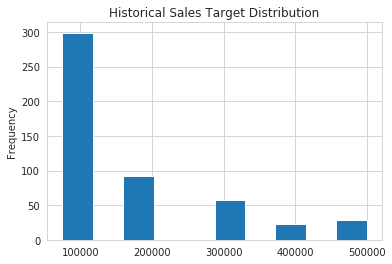

In [3]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]

In [4]:
def commissions(pct_target):
    if pct_target <= .90:
        return .02
    elif pct_target <= .99:
        return .03
    else:
        return .04

In [ ]:
sales = []
commission = []

for i in range(n_simulations):
    sales_target = np.random.choice(sales_target_values,n_reps,p=sales_target_prob)
    pct_target = np.random.normal(mean,st_dev,n_reps)
    
    df = pd.DataFrame({'% of Target':pct_target,'Sales Target ($)':sales_target})
    df['Sales ($)'] = df['% of Target'] * df['Sales Target ($)']
    
    df['Commission Rate']=df['% of Target'].apply(commissions)
    df['Commission ($)']=df['Commission Rate']*df['Sales ($)']
    
    sales.append(df['Sales ($)'].sum())
    commission.append(df['Commission ($)'].sum())
    
    print(df.head(5))

(array([  4.,  28.,  90., 192., 235., 242., 129.,  60.,  14.,   6.]),
 array([75722460.99873303, 77437588.01197335, 79152715.02521366,
        80867842.03845398, 82582969.0516943 , 84298096.06493461,
        86013223.07817493, 87728350.09141526, 89443477.10465558,
        91158604.11789589, 92873731.13113621]),
 <a list of 10 Patch objects>)

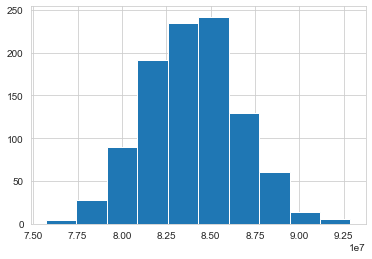

In [60]:
plt.hist(sales)

(array([ 17.,  63., 131., 217., 227., 174., 112.,  45.,  10.,   4.]),
 array([2628071.53608584, 2688694.91345722, 2749318.2908286 ,
        2809941.66819999, 2870565.04557137, 2931188.42294275,
        2991811.80031413, 3052435.17768552, 3113058.5550569 ,
        3173681.93242828, 3234305.30979966]),
 <a list of 10 Patch objects>)

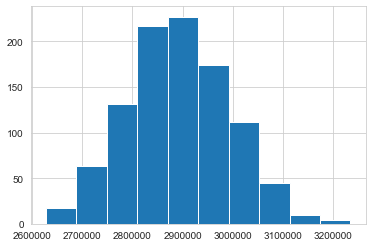

In [62]:
plt.hist(commission)

In [7]:
sales_ci = st.t.interval(0.95,df=len(sales)-1,loc=np.mean(sales),scale=st.sem(sales))

In [8]:
import locale
locale.setlocale( locale.LC_ALL, '' )
locale.currency(sales_ci[1], grouping=True )

'$84,089,743.87'

In [9]:
commission_si=st.t.interval(0.95,df=len(commission)-1,loc=np.mean(commission),scale=st.sem(commission))
locale.setlocale( locale.LC_ALL, '' )
locale.currency(commission_si[1], grouping=True )

'$2,897,061.93'